In [ ]:
# Employee Attrition using Machine Learning

In [78]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("C:/Users/ISHITA GUPTA/Downloads//employee.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.shape

(1470, 35)

In [4]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [5]:
## To check number of null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [6]:
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
attrition_count

Attrition
No        1233
Yes        237

In [7]:
## Dropping irrelevant data
df.drop(['EmployeeCount' , 'EmployeeNumber'] , axis = 1)

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
...   ...       ...                ...        ...                     ...   
1440   36        No  Travel_Frequently        688  Research & Development   
1441   56        No         Non-Travel        667  Research & Development   
1442   29       Yes      Travel_Rarely       1092  Research & Development   
1443   42        No      Travel_Rarely        300  Research & Development   
1444   56       Yes      Travel_Rarely        310  Research & Development   
1445   41        No      Travel_Rarely        582  Research & Development   
1446   34        No      Travel_Rarely        704                   Sales   
1447   36        No         Non-Travel        301                   Sales   
1448   41        No      Travel_Rarely        930                   Sales   
1449   32        No      Travel_Rarely        529  Research & Development   
1450   35        No      Travel_Rarely       1146         Human Resources   
1451   38        No      Travel_Rarely        345                   Sales   
1452   50       Yes  Travel_Frequently        878                   Sales   
1453   36        No      Travel_Rarely       1120                   Sales   
1454   45        No      Travel_Rarely        374                   Sales   
1455   40        No      Travel_Rarely       1322  Research & Development   
1456   35        No  Travel_Frequently       1199  Research & Development   
1457   40        No      Travel_Rarely       1194  Research & Development   
1458   35        No      Travel_Rarely        287  Research & Development   
1459   29        No      Travel_Rarely       1378  Research & Development   
14

In [12]:
df.groupby('Department').sum()

Age  DailyRate  DistanceFromHome  Education  \
Department                                                              
Human Resources          2382      47347               548        187   
Research & Development  35598     775384              8788       2786   
Sales                   16298     356923              4177       1309   

                        EmployeeCount  EmployeeNumber  \
Department                                              
Human Resources                    63           75932   
Research & Development            961          967250   
Sales                             446          463370   

                        EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Department                                                                    
Human Resources                             169        4051             173   
Research & Development                     2637       63587            2635   
Sales                                      1195       29222            1205   

                        JobLevel  ...  RelationshipSatisfaction  \
Department                        ...                             
Human Resources              128  ...                       182   
Research & Development      1900  ...                      2603   
Sales                       1006  ...                      1202   

                        StandardHours  StockOptionLevel  TotalWorkingYears  \
Department                                                                   
Human Resources                  5040                49                728   
Research & Development          76880               773              10900   
Sales                           35680               345               4953   

                        TrainingTimesLastYear  WorkLifeBalance  \
Department                                                       
Human Resources                           161              184   
Research & Development                   2684             2619   
Sales                                    1270             1256   

                        YearsAtCompany  YearsInCurrentRole  \
Department                                                   
Human Resources                    456                 223   
Research & Development            6597                3993   
Sales                             3249                2001   

                        YearsSinceLastPromotion  YearsWithCurrManager  
Department                                                             
Human Resources                             112                   231  
Research & Development                     2054                  3925  
Sales                                      1050                  1905  

[3 rows x 26 columns]

In [15]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

In [ ]:
# Plotting Data

<BarContainer object of 1470 artists>

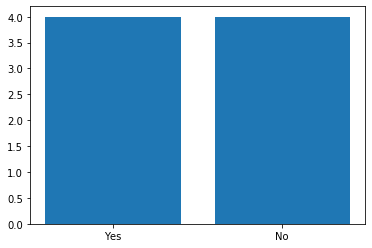

In [16]:
plt.bar(x=df['Attrition'],height=df['JobSatisfaction'])

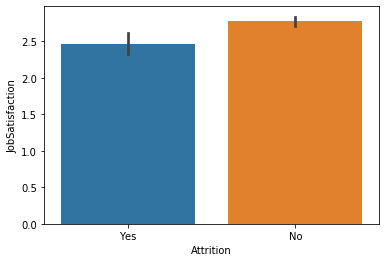

In [17]:
sns.barplot(x='Attrition',y='JobSatisfaction',data=df)

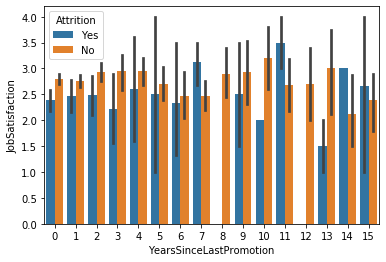

In [22]:
sns.barplot(x='YearsSinceLastPromotion',y='JobSatisfaction',data=df,hue='Attrition')

C:\Users\ISHITA GUPTA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ISHITA GUPTA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


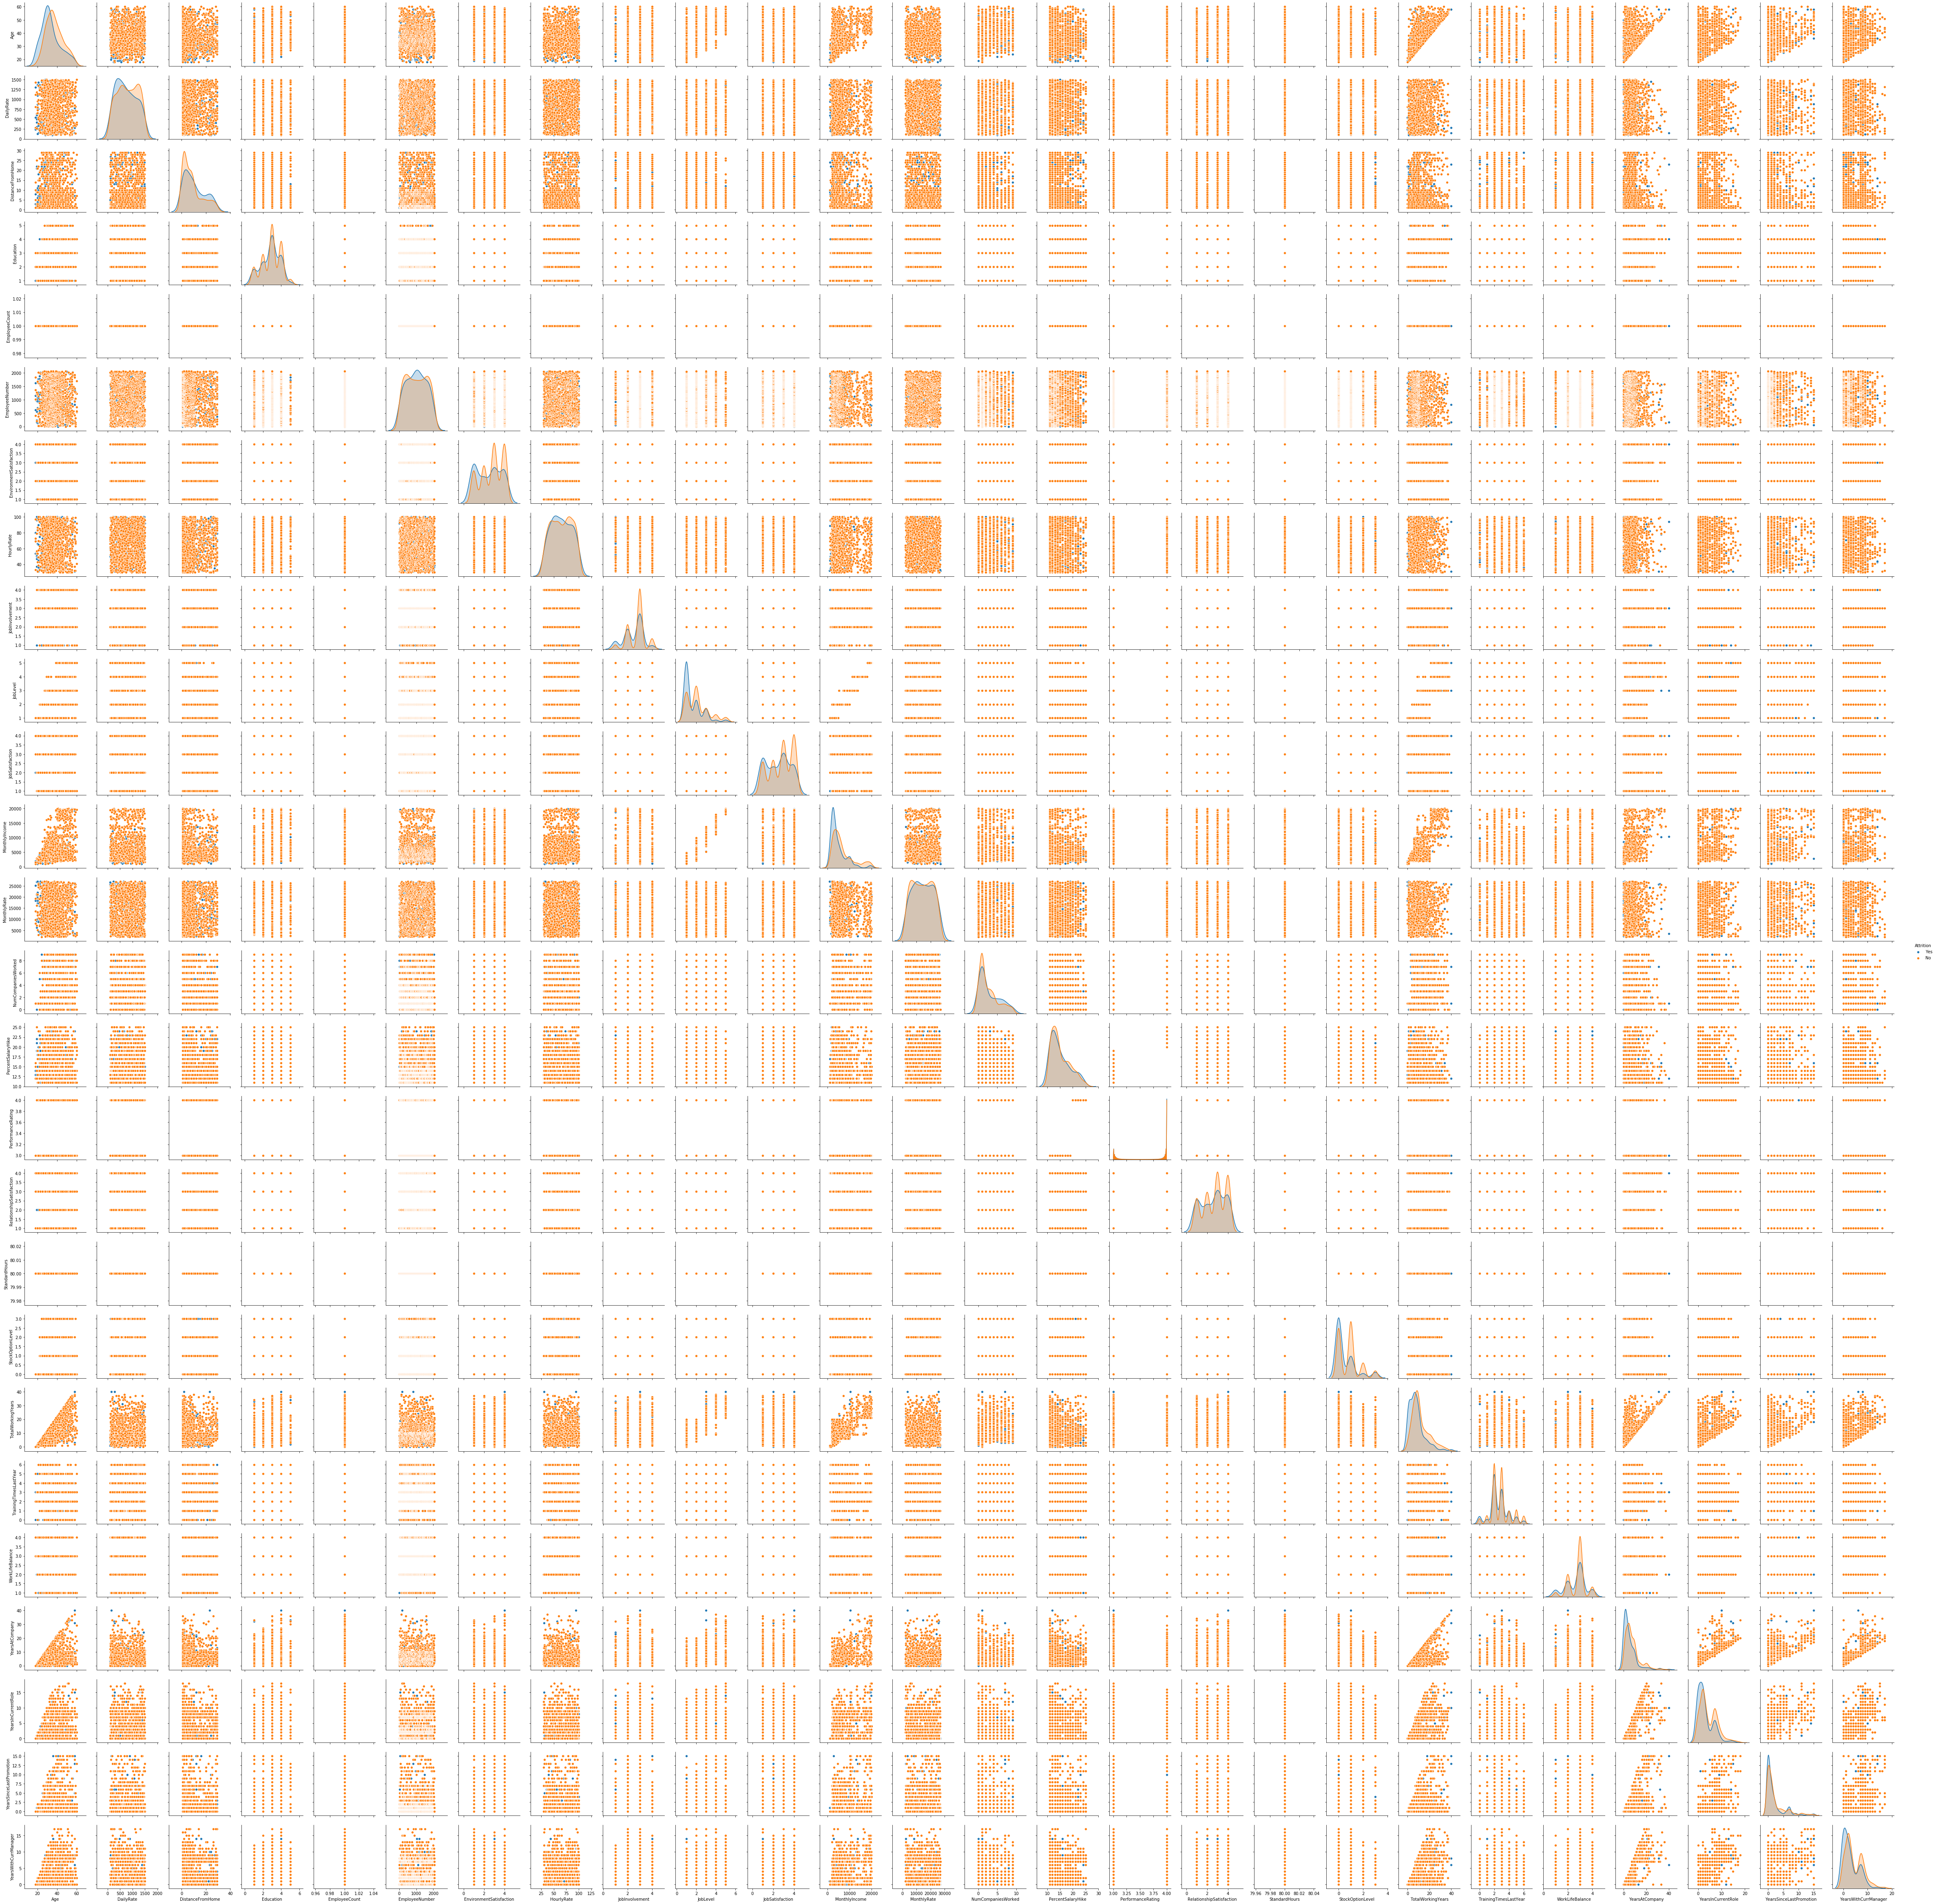

In [30]:
sns.pairplot(df,hue='Attrition')

In [63]:
# Taking out the target variable
Y = df['Attrition']

In [64]:
df = df.drop(columns = ['Attrition','EmployeeNumber','EmployeeCount','StandardHours'])

In [66]:
# Feature Encoding 
le = LabelEncoder() 
Y = le.fit_transform(Y)

In [68]:
# Testing and Training data Split
Train_x, Test_x, Train_y, Test_y = train_test_split(df, Y, test_size=0.35, random_state= 40)

In [69]:
# Model training
reg = linear_model.LogisticRegression()
reg.fit(Train_x,Train_y)

C:\Users\ISHITA GUPTA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# Making Predictions
predict = reg.predict(Test_x)

In [71]:
# Checking Accuracy
accuracy_score(Test_y, predict)

0.8757281553398059

In [77]:
# Checking Confusion Matrix
confu_mat = confusion_matrix(Test_y, predict)
print(confu_mat)

[[430   2]
 [ 62  21]]


In [73]:
# Checking the Random Forest Classifier
lm2 = RandomForestClassifier(n_estimators= 300,random_state= 20).fit(Train_x,Train_y)
forest_pred = lm2.predict(Test_x)

In [74]:
## Accuracy of Random Forest 
accuracy_score(Test_y, forest_pred)

0.8504854368932039

In [75]:
## Confusion Matrix
confu_mat = confusion_matrix(Test_y, forest_pred)
print(confu_mat)

[[432   0]
 [ 77   6]]


In [86]:
# Separating continuous and catagorical data
con=[]
cat=[]
for i in df.columns:
    if df[i].dtypes=='int64':
        con.append(i)
    elif df[i].dtypes=='object':
        cat.append(i)


In [88]:
con

['DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [89]:
cat

[]

C:\Users\ISHITA GUPTA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ISHITA GUPTA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


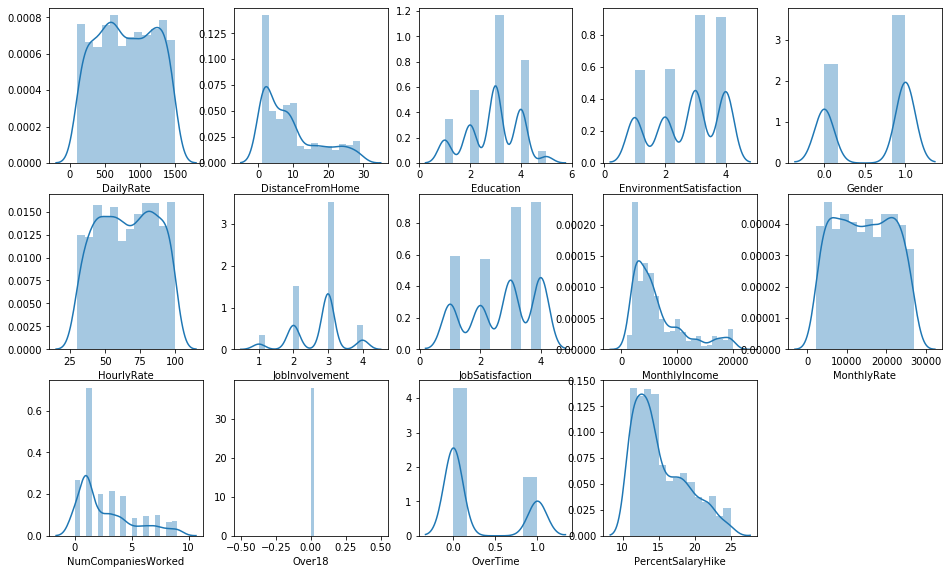

In [90]:
# Checking the distribution of Values in continous features
plt.figure(figsize = (16,20))
for i in range(0,14):
    plt.subplot(6,5,i+1)
    sns.distplot(df[con[i]])